Using COAsT to compute the Empirical Orthogonal Functions (EOFs) of your data

### Relevant imports and filepath configuration

In [2]:
# Begin by importing coast and other packages
import coast
import xarray as xr
import matplotlib.pyplot as plt

# Define some file paths
root = "../../"
dn_files = root + "./example_files/"

fn_nemo_dat_t = dn_files + "nemo_data_T_grid.nc"
fn_nemo_dom   = dn_files + "COAsT_example_NEMO_domain.nc"
fn_nemo_config = root + "./config/example_nemo_grid_t.json"

### Loading data

In [3]:
# Load data variables that are on the NEMO t-grid

nemo_t = coast.Gridded( fn_data = fn_nemo_dat_t, fn_domain = fn_nemo_dom, config = fn_nemo_config )

For a variable (or subset of a variable) with two spatial dimensions and one temporal dimension, i.e. (x,y,t), the EOFs, temporal projections and variance explained can be computed by calling the ‘eofs’ method, and passing in the ssh DataArray as an argument. For example, for the sea surface height field, we can do

### Compute EOF

In [4]:
eof_data = coast.compute_eofs( nemo_t.dataset.ssh )

The method returns an xarray dataset that contains the EOFs, temporal projections and variance as DataArrays

In [5]:
eof_data

<xarray.Dataset>
Dimensions:        (mode: 7, y_dim: 375, x_dim: 297, t_dim: 7)
Coordinates:
  * mode           (mode) int64 1 2 3 4 5 6 7
    longitude      (y_dim, x_dim) float32 -19.89 -19.78 -19.67 ... 12.89 13.0
    latitude       (y_dim, x_dim) float32 40.07 40.07 40.07 ... 65.0 65.0 65.0
    time           (t_dim) datetime64[ns] 2010-01-01T12:00:00 ... 2010-01-07T...
Dimensions without coordinates: y_dim, x_dim, t_dim
Data variables:
    EOF            (y_dim, x_dim, mode) float32 nan nan nan nan ... nan nan nan
    temporal_proj  (t_dim, mode) float32 -2.223 -8.439 -11.31 ... 1.45 1.145e-06
    variance       (mode) float32 dask.array<chunksize=(7,), meta=np.ndarray>

### Inspect EOFs
The variance explained of the first four modes is

In [6]:
eof_data.variance.sel(mode=[1,2,3,4])

<xarray.DataArray 'variance' (mode: 4)>
dask.array<getitem, shape=(4,), dtype=float32, chunksize=(4,), chunktype=numpy.ndarray>
Coordinates:
  * mode     (mode) int64 1 2 3 4
Attributes:
    standard name:  percentage of variance explained

### Plotting
And the EOFs and temporal projections can be quick plotted:

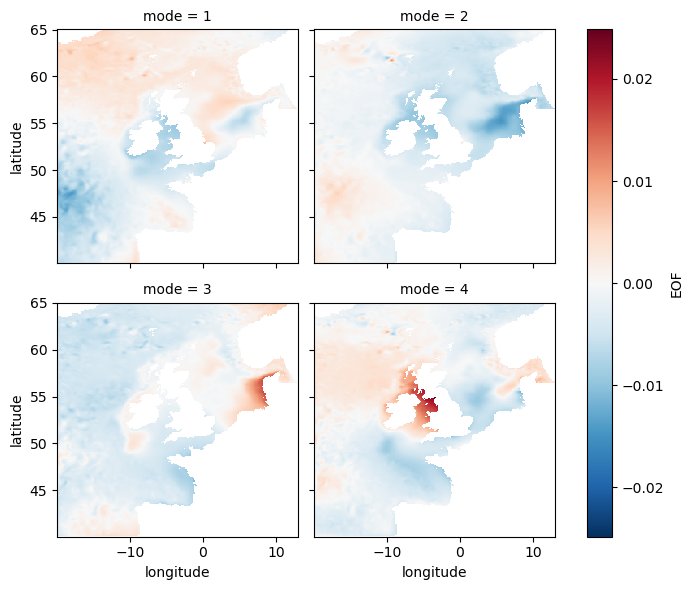

In [7]:
eof_data.EOF.sel(mode=[1,2,3,4]).plot.pcolormesh(col='mode',col_wrap=2,x='longitude',y='latitude')

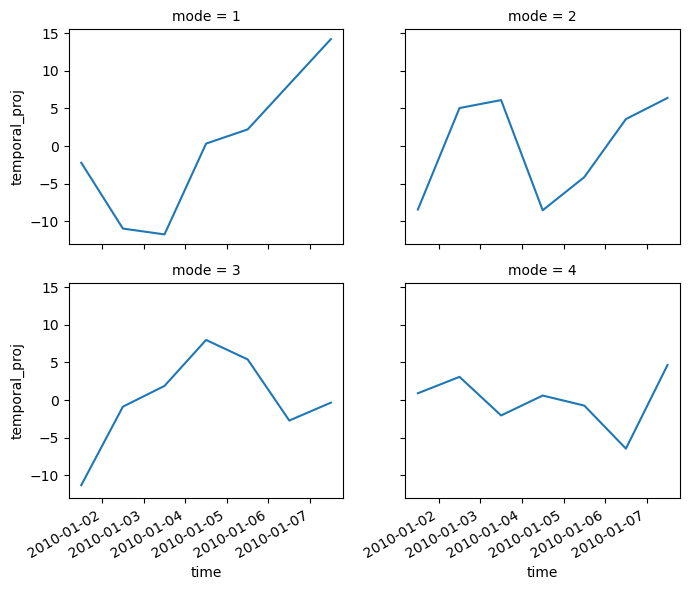

In [8]:
eof_data.temporal_proj.sel(mode=[1,2,3,4]).plot(col='mode',col_wrap=2,x='time')

### Complex EOFs
The more exotic hilbert complex EOFs can also be computed to investigate the propagation of variability, for example:

In [9]:
heof_data = coast.compute_hilbert_eofs( nemo_t.dataset.ssh )
heof_data

<xarray.Dataset>
Dimensions:         (mode: 7, y_dim: 375, x_dim: 297, t_dim: 7)
Coordinates:
  * mode            (mode) int64 1 2 3 4 5 6 7
    longitude       (y_dim, x_dim) float32 -19.89 -19.78 -19.67 ... 12.89 13.0
    latitude        (y_dim, x_dim) float32 40.07 40.07 40.07 ... 65.0 65.0 65.0
    time            (t_dim) datetime64[ns] 2010-01-01T12:00:00 ... 2010-01-07...
Dimensions without coordinates: y_dim, x_dim, t_dim
Data variables:
    EOF_amp         (y_dim, x_dim, mode) float32 nan nan nan nan ... nan nan nan
    EOF_phase       (y_dim, x_dim, mode) float32 nan nan nan nan ... nan nan nan
    temporal_amp    (t_dim, mode) float32 18.39 9.522 ... 4.173e-07 7.364e-07
    temporal_phase  (t_dim, mode) float32 180.0 180.0 0.0 ... 92.49 171.8 81.57
    variance        (mode) float32 57.99 27.12 14.88 ... 1.321e-13 9.365e-14

now with the modes expressed by their amplitude and phase, the spatial propagation of the variability can be examined through the EOF_phase.
